In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [9]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]],
                    dtype = np.float32)
y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]],
                    dtype = np.float32)

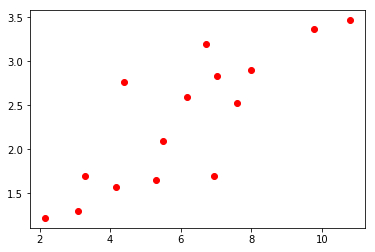

In [10]:
plt.plot(x_train, y_train, 'ro', label='Original Data')
plt.show()

In [22]:
X_train = torch.from_numpy(x_train)
Y_train = torch.from_numpy(y_train)

In [23]:
input_size = 1
# single layer with 100 neurons
hidden_size = 100
output_size = 1
learning_rate = 0.000006

In [30]:
w1 = torch.rand(input_size, hidden_size, requires_grad=True)
w1.shape

torch.Size([1, 100])

In [31]:
w2 = torch.rand(hidden_size, output_size, requires_grad=True)
w2.shape

torch.Size([100, 1])

In [32]:
for iter in range(1, 301):
    
    # clamp negative numbers to zero. i.e ReLU activation
    y_pred = X_train.mm(w1).clamp(min=0).mm(w2)
    loss = (y_pred - Y_train).pow(2).sum() # MSE Loss
    
    if iter % 50 == 0:
        print(iter, loss.item())
    
    # Use autograd for an automated way of implementing the backward pass through the neural network
    loss.backward()
    
    # Once gradient have been computed, we manually updated the model weights.
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        w1.grad.zero_()
        w2.grad.zero_()

50 3.632634162902832
100 3.6326258182525635
150 3.632627010345459
200 3.632627487182617
250 3.632627487182617
300 3.6326282024383545


In [33]:
print("w1: ", w1)
print("w2: ", w2)

w1:  tensor([[ 0.3259,  0.2629,  0.4507,  0.7686,  0.1117,  0.1692, -0.1246,  0.2412,
          0.5869, -0.0098,  0.2961,  0.1691, -0.0110,  0.9244,  0.1608,  0.0528,
          0.3896,  0.4183,  0.3733, -0.0458,  0.5841,  0.2970,  0.0451,  0.5246,
          1.0145,  0.4098,  0.1451,  0.0849,  0.3681,  0.4008,  0.2630,  0.7423,
          0.0580,  0.6135,  0.0856,  0.4898, -0.0092, -0.0150,  0.0838,  0.1860,
          0.8907,  1.0218,  0.5578,  0.3130,  0.7194, -0.0180,  0.7046, -0.0010,
          0.5389, -0.0017, -0.1198, -0.0018, -0.0847,  0.1373, -0.0660, -0.0187,
         -0.0119,  0.1503,  0.1424,  0.7235,  0.2276,  0.4991,  0.5094,  0.4997,
          0.4374,  0.3073,  0.6321,  0.4806,  0.7805,  0.0042,  0.7923,  0.2977,
         -0.0381,  0.3122,  0.9280, -0.0364,  0.6316,  0.0517,  0.3181,  1.0429,
          0.1960,  0.3813,  0.4107, -0.0751, -0.0057,  0.5305, -0.0065,  0.3614,
         -0.0036,  0.1491,  0.7458, -0.0100,  0.4737, -0.0636, -0.0034,  0.4091,
          0.0002,  0.36

In [34]:
x_train_tensor = torch.from_numpy(x_train)
x_train_tensor

tensor([[ 3.3000],
        [ 4.4000],
        [ 5.5000],
        [ 6.7100],
        [ 6.9300],
        [ 4.1680],
        [ 9.7790],
        [ 6.1820],
        [ 7.5900],
        [ 2.1670],
        [ 7.0420],
        [10.7910],
        [ 5.3130],
        [ 7.9970],
        [ 3.1000]])

In [35]:
predicted_in_tensor = x_train_tensor.mm(w1).clamp(min=0).mm(w2)
predicted_in_tensor

tensor([[1.2115],
        [1.6153],
        [2.0191],
        [2.4634],
        [2.5441],
        [1.5301],
        [3.5900],
        [2.2695],
        [2.7864],
        [0.7955],
        [2.5852],
        [3.9616],
        [1.9505],
        [2.9358],
        [1.1381]], grad_fn=<MmBackward>)

In [36]:
# Detach the tensor from the current graph so no gradients are computed on the new tensor
predicted = predicted_in_tensor.detach().numpy()
predicted

array([[1.2114849],
       [1.6153133],
       [2.019142 ],
       [2.4633532],
       [2.5441194],
       [1.5301425],
       [3.590033 ],
       [2.2695158],
       [2.786416 ],
       [0.7955422],
       [2.585235 ],
       [3.9615564],
       [1.950491 ],
       [2.935832 ],
       [1.1380615]], dtype=float32)

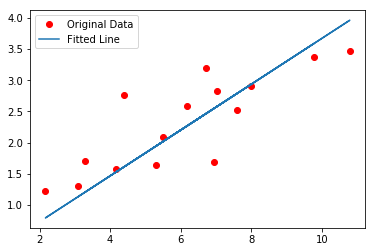

In [37]:
plt.plot(x_train, y_train, 'ro', label='Original Data')
plt.plot(x_train, predicted, label = 'Fitted Line')

plt.legend()

plt.show()